In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [4]:
client_rounds = ["clientRound0", "clientRound1", "clientRound2", "clientRound3"]
server_rounds = ["serverRound1", "serverRound1", "serverRound2", "serverRound3"]

def process_json_benchmark(path):
    
    df_original = pd.read_json(path)
    df_mean = df_original.applymap(np.mean)
    df_sum_client = df_mean.loc[client_rounds, :].sum()
    df_sum_server = df_mean.loc[server_rounds, :].sum()
    
    return df_mean, df_sum_client, df_sum_server

df_nd_0_mean, df_nd_0_sum_client, df_nd_0_sum_server = process_json_benchmark("benchmark_results/no_dropouts_0_10.json")
df_nd_1_mean, df_nd_1_sum_client, df_nd_1_sum_server = process_json_benchmark("benchmark_results/no_dropouts_1_2.json")

df_wd_0_2_mean, df_wd_0_2_sum_client, df_wd_0_2_sum_server = process_json_benchmark("benchmark_results/dropouts_0_0.2_10.json")
df_wd_0_4_mean, df_wd_0_4_sum_client, df_wd_0_4_sum_server = process_json_benchmark("benchmark_results/dropouts_0_0.4_10.json")
df_wd_0_6_mean, df_wd_0_6_sum_client, df_wd_0_6_sum_server = process_json_benchmark("benchmark_results/dropouts_0_0.6_10.json")

df_wd_1_2_mean, df_wd_1_2_sum_client, df_wd_1_2_sum_server = process_json_benchmark("benchmark_results/dropouts_1_0.2_2.json")
df_wd_1_4_mean, df_wd_1_4_sum_client, df_wd_1_4_sum_server = process_json_benchmark("benchmark_results/dropouts_1_0.4_2.json")
df_wd_1_6_mean, df_wd_1_6_sum_client, df_wd_1_6_sum_server = process_json_benchmark("benchmark_results/dropouts_1_0.6_2.json")

In [5]:
df_wd_0_6_mean

,5,10,15,20,25,30,35,40,45,50
clientRound0,15.4,6.6,8.1,9.2,9.4,9.2,10.5,6.5,5.4,4.7
serverRound0,0.2,0.2,0.0,0.2,0.2,0.2,0.7,0.1,0.3,0.1
clientRound1,78.9,244.3,396.1,515.6,637.5,743.5,824.2,748.6,832.4,902.4
serverRound1,0.2,0.6,0.9,1.2,2.6,3.0,4.2,3.0,3.7,4.4
clientRound2,0.0,0.0,0.4,0.2,0.3,0.1,0.3,0.4,0.2,0.2
serverRound2,0.1,0.1,0.1,0.0,0.3,0.2,0.6,0.5,0.3,0.4
clientRound3,0.8,1.5,2.7,3.0,4.3,4.4,7.6,4.0,4.3,5.1
serverRound3,57.6,328.6,771.2,1345.8,2112.3,2835.9,4323.5,5879.0,7182.5,7949.9


In [6]:
def plot_benchmark(no_dropout, dropout_2, dropout_4, dropout_6):
    fig = plt.figure(figsize=(12, 8))
    
    plt.plot(no_dropout, label="0% dropouts")
    plt.plot(dropout_2, label="20% dropouts")
    plt.plot(dropout_4, label="40% dropouts")
    plt.plot(dropout_6, label="60% dropouts")

    plt.xlabel("Number of Clients", fontsize=17)
    plt.ylabel("Running Time (ms)", fontsize=17)

    plt.legend(prop={'size': 17})
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()
    return fig

In [7]:
df_nd_1_mean

,20,40,60,80,100,120,140,160,180,200
clientRound0,6.5,14.0,9.0,5.5,6.0,5.0,7.0,5.5,5.5,6.0
serverRound0,0.0,0.5,0.0,0.5,0.0,0.0,1.0,0.5,0.5,0.0
clientRound1,345.0,721.5,1121.5,1525.5,1811.0,2193.5,2624.0,2977.0,3578.0,3877.5
serverRound1,1.0,3.5,6.5,13.0,20.5,27.5,36.0,49.0,70.5,75.5
clientRound2,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.5,0.5
serverRound2,0.0,1.5,3.5,5.0,10.5,18.5,25.0,39.0,51.0,66.0
clientRound3,2.0,5.0,5.5,12.5,11.0,20.5,24.5,25.5,29.5,45.5
serverRound3,4.0,18.0,48.0,109.0,191.5,260.5,408.5,589.0,675.0,976.5


In [8]:
df_wd_1_6_mean

,20,40,60,80,100,120,140,160,180,200
clientRound0,4.5,4.5,5.5,4.0,4.5,16.0,4.5,5.0,6.0,5.5
serverRound0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0
clientRound1,356.5,759.5,1125.5,1436.5,1773.0,2272.0,2511.5,2885.0,3197.5,3630.5
serverRound1,3.0,3.0,7.0,12.0,21.5,28.0,38.0,49.0,63.0,79.5
clientRound2,0.0,0.0,0.0,0.5,1.0,0.0,0.5,0.0,0.0,0.0
serverRound2,0.0,1.0,1.0,1.0,2.5,5.5,6.0,9.0,12.0,15.0
clientRound3,2.0,3.5,6.0,10.5,10.5,21.5,37.0,16.0,33.5,54.0
serverRound3,1133.5,4780.5,11003.5,19602.5,29653.5,42573.5,59757.0,76930.5,99179.0,130248.0


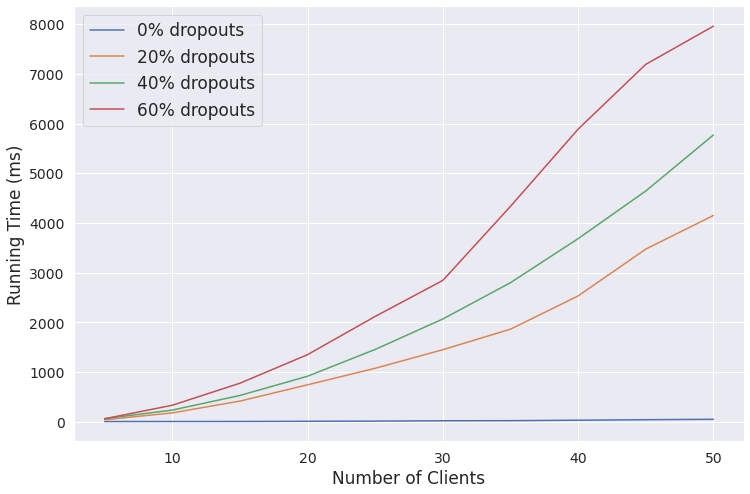

In [9]:
plot_0_server = plot_benchmark(df_nd_0_sum_server, df_wd_0_2_sum_server, df_wd_0_4_sum_server, df_wd_0_6_sum_server)

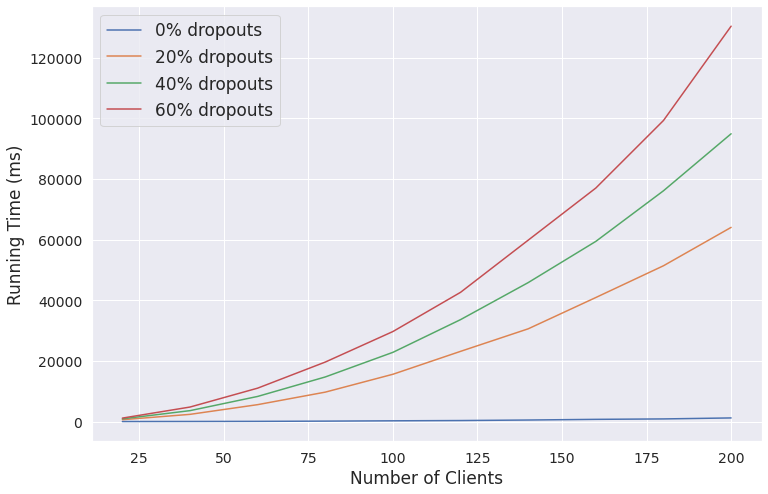

In [10]:
plot_1_server = plot_benchmark(df_nd_1_sum_server, df_wd_1_2_sum_server, df_wd_1_4_sum_server, df_wd_1_6_sum_server)

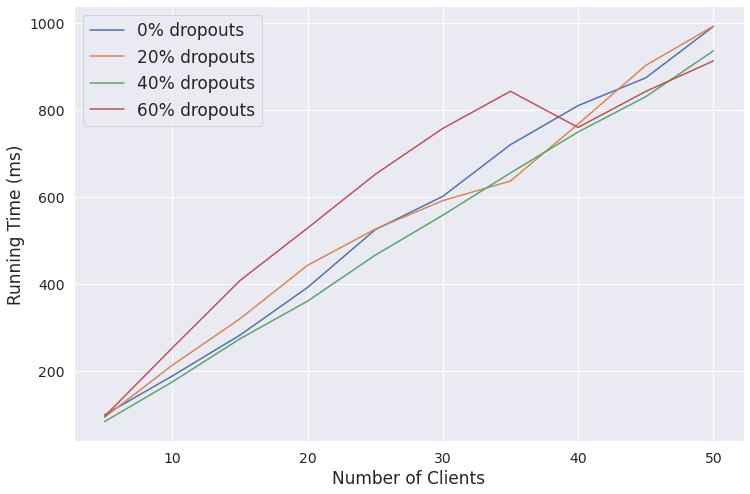

In [11]:
plot_0_client = plot_benchmark(df_nd_0_sum_client, df_wd_0_2_sum_client, df_wd_0_4_sum_client, df_wd_0_6_sum_client)

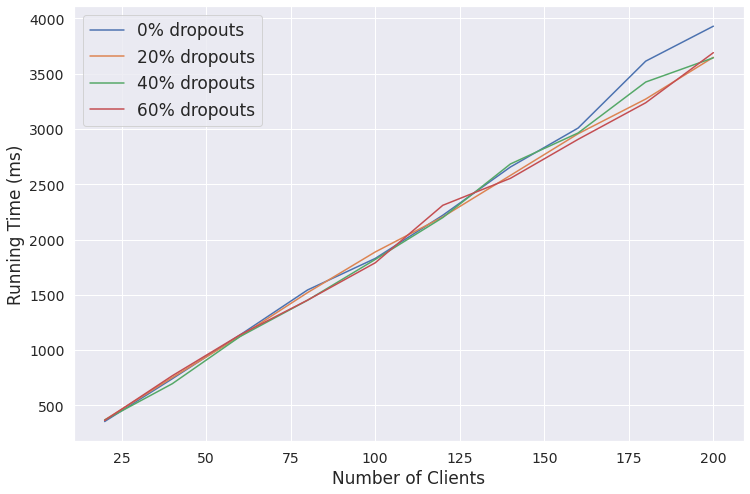

In [9]:
plot_1_client = plot_benchmark(df_nd_1_sum_client, df_wd_1_2_sum_client, df_wd_1_4_sum_client, df_wd_1_6_sum_client)

In [10]:
plot_0_client.savefig("plots/plot_0_client.png")
plot_1_client.savefig("plots/plot_1_client.png")
plot_0_server.savefig("plots/plot_0_server.png")
plot_1_server.savefig("plots/plot_1_server.png")